In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation

import numpy as np

In [34]:
# Replace 'your_file.csv' with the path to your CSV file
language_df = pd.read_csv('data/languages_dataset.csv')

# Display the first few rows of the dataframe
language_df


,Language,Family,Region,Speakers,Writing System,ISO Code
0,Yoruba,Indo-European,India,76000000,Latin,om
1,Southern Min,Indo-European,India,47000000,Latin,ru
2,Yue (Cantonese),Dravidian,India,75000000,Devanagari,my
3,Spanish,Austronesian,Poland,76900000,Devanagari,it
4,Arabic,Indo-European,Worldwide,76000000,Hangul,ur
...,...,...,...,...,...,...
495,Punjabi,Indo-Iranian,India,23000000,Latin,ha
496,Spanish,Dravidian,Worldwide,76900000,Tamil,bn
497,English,Indo-European,"Germany, Austria",28000000,Latin,hak
498,Xiang (Hunanese),Indo-European,Worldwide,460000000,Kannada,pa


### How many language comes from a specific family 

In [57]:
family_counts = language_df['Family'].value_counts()
family_counts

Family
Indo-European    228
Sino-Tibetan      76
Dravidian         36
Turkic            34
Afro-Asiatic      26
Austronesian      24
Niger-Congo       24
Indo-Iranian      16
Kra-Dai           12
Austroasiatic     10
Koreanic           8
Japonic            6
Name: count, dtype: int64

/home/blina/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


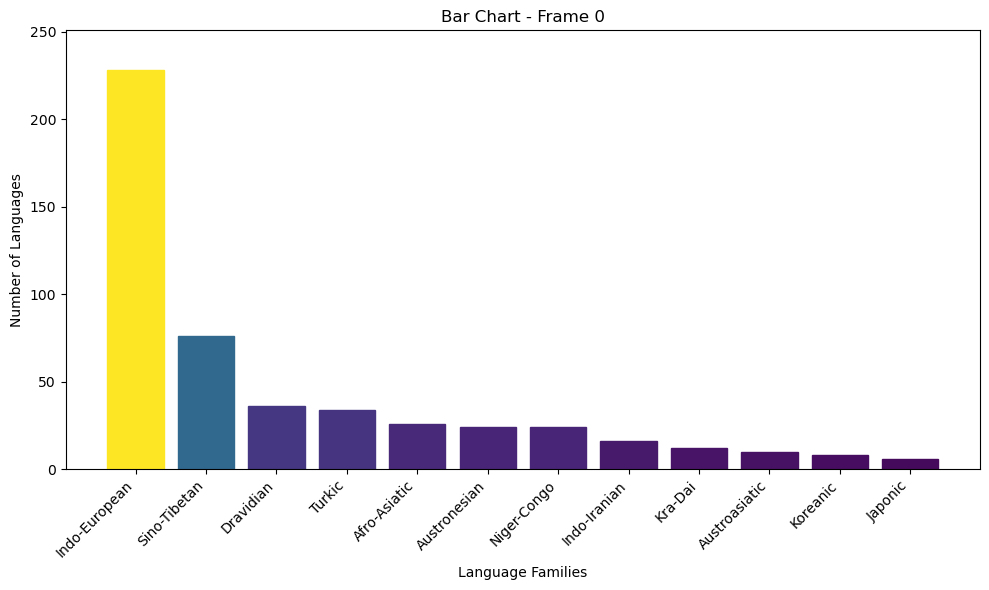

In [132]:
# Count the number of languages in each family
family_counts = language_df['Family'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

categories = family_counts.index
values = family_counts.values

bars = ax.bar(categories, values, color=plt.cm.viridis(np.linspace(0, 1, len(categories))))

def update(frame):
    new_values = family_counts.values  # Static data for this example
    for bar, value in zip(bars, new_values):
        bar.set_height(value)
        bar.set_color(plt.cm.viridis(value / max(new_values)))
    ax.set_ylim(0, max(new_values) * 1.1)
    ax.set_title(f'Bar Chart - Frame {frame}')

ani = animation.FuncAnimation(fig, update, frames=100, interval=200, repeat=False)

plt.xlabel('Language Families')
plt.ylabel('Number of Languages')
plt.title('How many language comes from a specific family?')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('results/count_languages_based_on_famil.png', format='png')
plt.show()

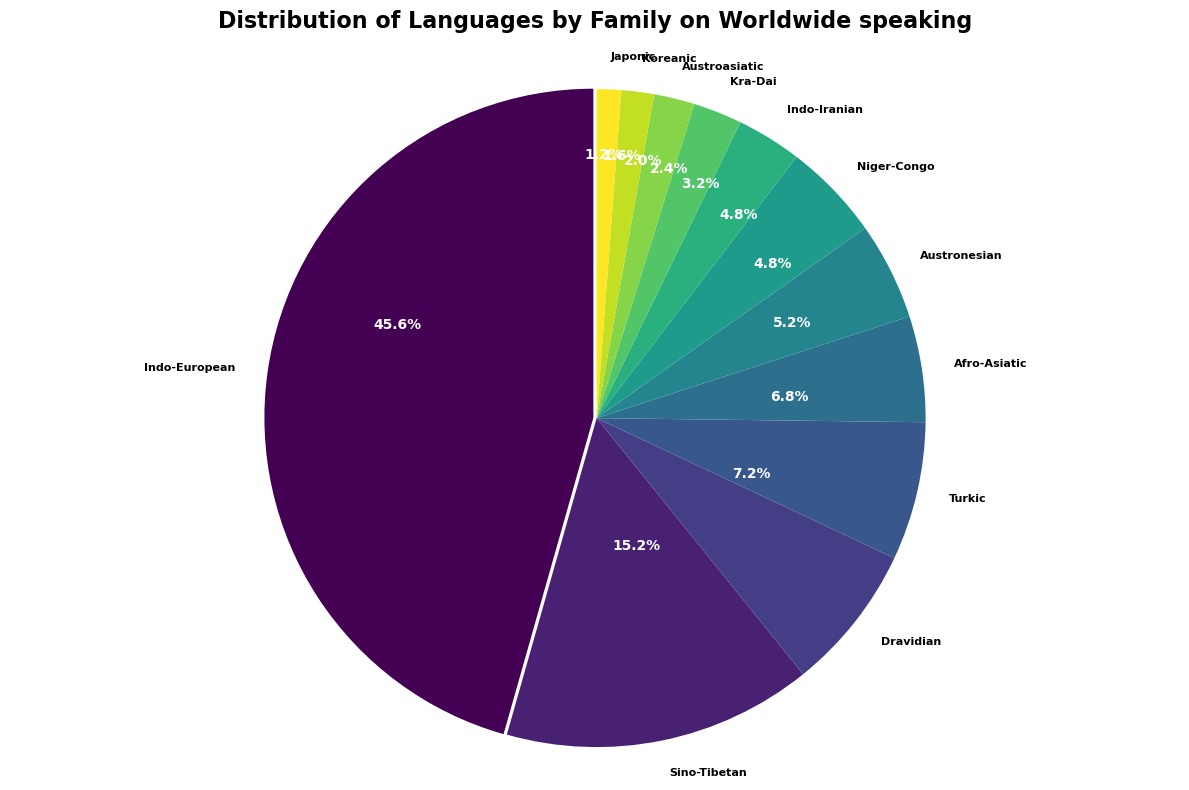

In [133]:
# Determine the index of the largest slice
max_index = family_counts.idxmax()

# Create an explode array to separate the largest slice
explode = [0.01 if idx == max_index else 0 for idx in family_counts.index]

# Define a more harmonious color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(family_counts)))

# Plot a pie chart
plt.figure(figsize=(12, 8), facecolor='white')
wedges, texts, autotexts = plt.pie(
    family_counts, 
    labels=family_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    textprops={'color': 'white', 'fontsize': 10, 'weight': 'bold'}, 
    explode=explode,
    startangle=90,
)

# Enhance the title
plt.title('Distribution of Languages by Family on Worldwide speaking', fontsize=16, weight='bold', color='black', pad=20)

# Improve the visibility of the labels
for text in texts:
    text.set_color('black')
    text.set_fontsize(8)

# Improve the visibility of the percentage labels
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')
    x, y = autotext.get_position()
    autotext.set_position((x, y + 0.20))


plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.savefig('results/Distribution of Languages by Family on Worldwide speakingpng', format='png')

plt.show()

In [134]:
family_languages = language_df[ (language_df['Family'] == 'Indo-European') & (language_df['Writing System'] == 'Latin') & (language_df['Region'] != 'Worldwide')] 
family_languages

,Language,Family,Region,Speakers,Writing System,ISO Code
0,Yoruba,Indo-European,India,76000000,Latin,om
1,Southern Min,Indo-European,India,47000000,Latin,ru
20,Hausa,Indo-European,"Portugal, Brazil",32000000,Latin,hak
25,Arabic,Indo-European,Indonesia,50000000,Latin,th
31,Pashto,Indo-European,China,125000000,Latin,az
...,...,...,...,...,...,...
476,French,Indo-European,Ukraine,154000000,Latin,pl
483,Mandarin,Indo-European,India,60000000,Latin,bho
488,Amharic,Indo-European,China,26000000,Latin,am
494,Kannada,Indo-European,Nigeria,918000000,Latin,pt


### Display based on region

In [138]:
# Filter the dataframe for languages spoken in Germany
region_languages = language_df[language_df['Region'] == 'Ukraine']

# Print the languages spoken in Germany
print(region_languages['Language'])

56             Persian
76     Yue (Cantonese)
147            Spanish
254            Amharic
315            Kannada
376            Kannada
462            Tagalog
476             French
Name: Language, dtype: object


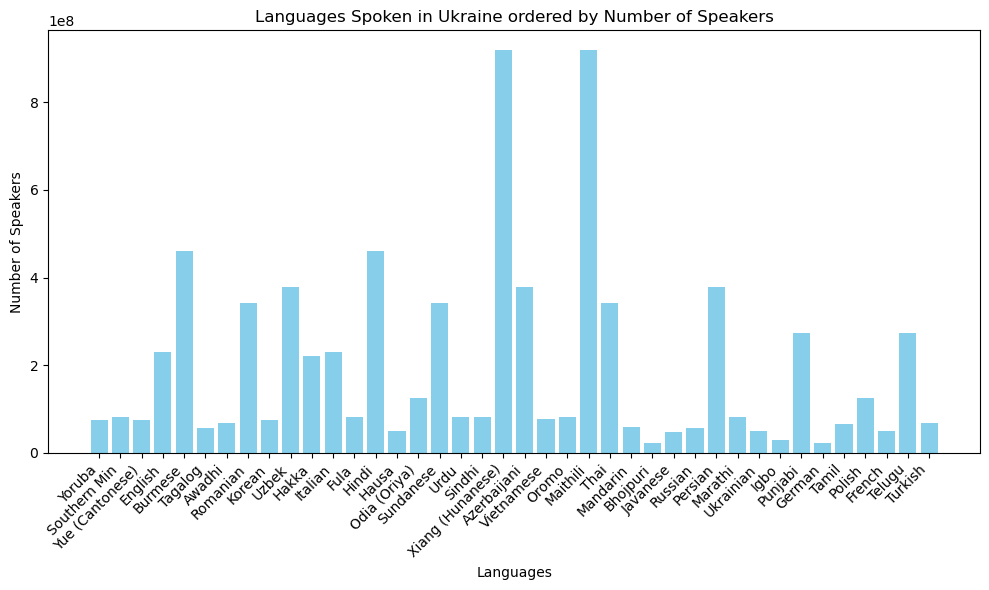

In [139]:
# Plot a bar chart for the number of speakers for each language

plt.figure(figsize=(10, 6))
plt.bar(germany_languages['Language'], germany_languages['Speakers'], color='skyblue')
plt.xlabel('Languages')
plt.ylabel('Number of Speakers')
plt.title('Languages Spoken in Ukraine ordered by Number of Speakers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.savefig('results/anguages Spoken in Ukraine	 ordered by Number of Speakers.png', format='png')

plt.show()

### Order the most to least regions with nunmber of total speakers

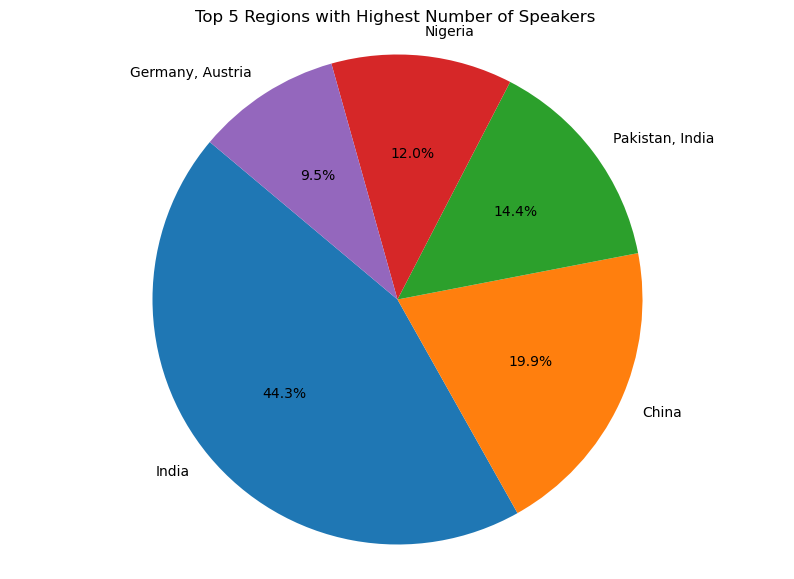

In [183]:
# Filter the DataFrame for Indo-European languages and non-Worldwide regions

filtered_df = language_df[(language_df['Region'] != 'Worldwide')]

grouped_df = filtered_df.groupby('Region')['Speakers'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Speakers', ascending=False)

# Select the top 5 regions with the highest number of speakers
top5_regions = sorted_df.head(5)

# Display the result
#print(top5_regions)

# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top5_regions['Speakers'], labels=top5_regions['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Regions with Highest Number of Speakers ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('results/Top 5 Regions with Highest Number of Speakers.png', format='png')


plt.show()


### How many regions speak 'family' Indo-European' languages?

In [179]:

# Count the number of unique regions
unique_regions_count = filtered_df['Region'].nunique()
unique_regions_count
print(f"The number of unique regions where Indo-European languages are spoken is: {unique_regions_count}")
print (f"regions: {filtered_df['Region'].unique()} ")

The number of unique regions where Indo-European languages are spoken is: 29
regions: ['India' 'Poland' 'Vietnam' 'China' 'Nigeria' 'Philippines'
 'Portugal, Brazil' 'Romania' 'Pakistan, India' 'Indonesia'
 'Russia, Eastern Europe' 'Korea' 'Afghanistan, Pakistan'
 'Germany, Austria' 'Azerbaijan' 'India, Pakistan' 'Thailand'
 'Bangladesh, India' 'Italy' 'China (Hong Kong)' 'Iran' 'Uzbekistan'
 'Ukraine' 'West Africa' 'Myanmar' 'Middle East, North Africa' 'Ethiopia'
 'Japan' 'Turkey'] 


### Top 5 regions with highest speakers in family 'indo-europian language.

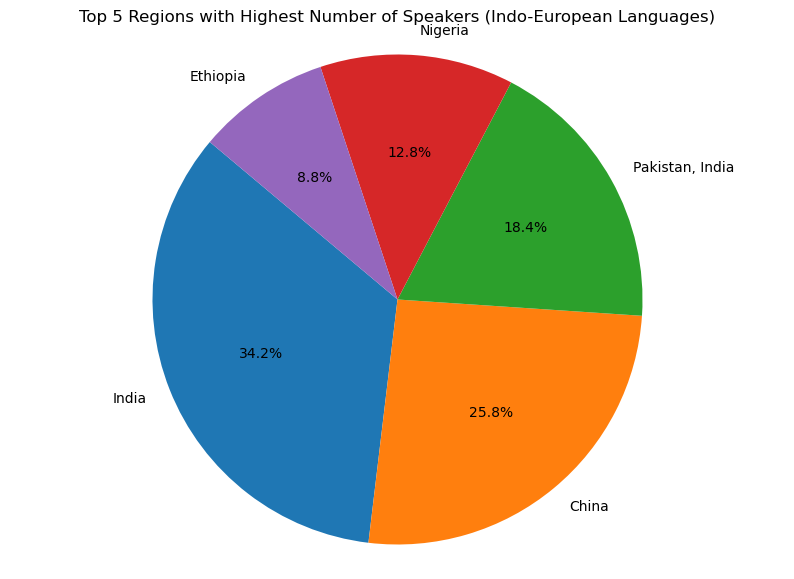

In [185]:
# Filter the DataFrame for Indo-European languages and non-Worldwide regions

filtered_df = language_df[(language_df['Family'] == 'Indo-European') & (language_df['Region'] != 'Worldwide')]

grouped_df = filtered_df.groupby('Region')['Speakers'].sum().reset_index()
sorted_df = grouped_df.sort_values(by='Speakers', ascending=False)

# Select the top 5 regions with the highest number of speakers
top5_regions = sorted_df.head(5)

# Display the result
#print(top5_regions)

# Plot a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top5_regions['Speakers'], labels=top5_regions['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Regions with Highest Number of Speakers (Indo-European Languages)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('results/Top 5 Regions with Highest Number of Speakers (Indo-European Languages).png', format='png')


plt.show()
